<a href="https://colab.research.google.com/github/rgolds5/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/Sprint-Challenge-3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 3

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 (the class attribute) is the most interesting, as it separates the 307 approved cases from the 383 rejected cases. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [56]:
! pip install --upgrade Cython
! pip install --upgrade git+https://github.com/statsmodels/statsmodels

Requirement already up-to-date: Cython in /usr/local/lib/python3.6/dist-packages (0.29.9)
  Cloning https://github.com/statsmodels/statsmodels to /tmp/pip-req-build-0ys3e9q4
  Running command git clone -q https://github.com/statsmodels/statsmodels /tmp/pip-req-build-0ys3e9q4
  Stored in directory: /tmp/pip-ephem-wheel-cache-jq3i2bwj/wheels/7d/ad/45/ac1a03bd759c2fa74c486e2b1950d94b55f511b4c2b0418bd5
Successfully built statsmodels
  Found existing installation: statsmodels 0.9.0
    Uninstalling statsmodels-0.9.0:
      Successfully uninstalled statsmodels-0.9.0


In [0]:
# TODO

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sms
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
pd.options.display.max_columns = None

data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data'
col_names = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
             'A11', 'A12', 'A13', 'A14', 'A15', 'A16']

df = pd.read_csv(data_url, header = None, names = col_names, na_values = '?')
df[['A2', 'A11', 'A14', 'A15']].astype(float, inplace = True)
assert df.shape == (690, 16)
df = df.dropna()


In [28]:
df.isna().sum()

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64

In [29]:
df.dtypes

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14    float64
A15      int64
A16     object
dtype: object

## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

<Figure size 432x288 with 0 Axes>

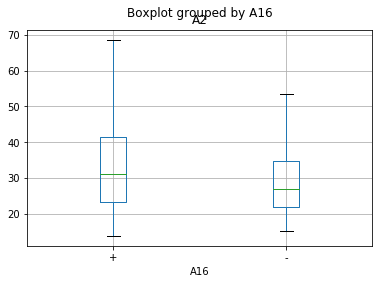

<Figure size 432x288 with 0 Axes>

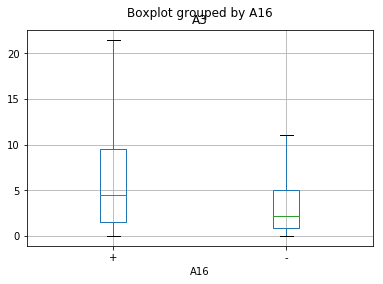

<Figure size 432x288 with 0 Axes>

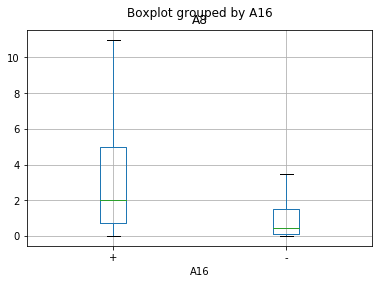

<Figure size 432x288 with 0 Axes>

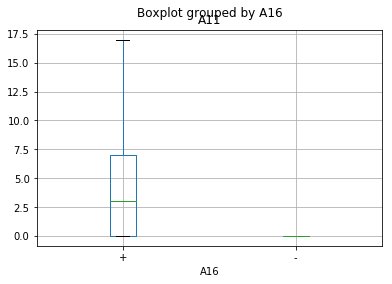

<Figure size 432x288 with 0 Axes>

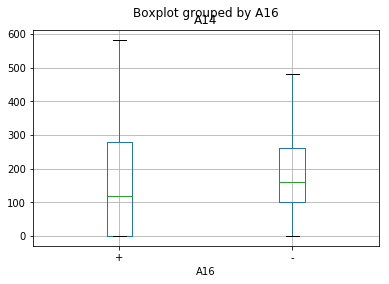

<Figure size 432x288 with 0 Axes>

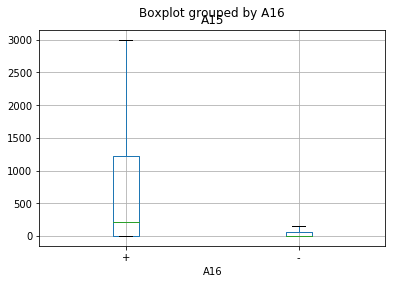

A1          a         b
A16                    
+    0.320946  0.679054
-    0.302521  0.697479
A4          l         u         y
A16                              
+    0.006757  0.841216  0.152027
-    0.000000  0.700280  0.299720
A5          g        gg         p
A16                              
+    0.841216  0.006757  0.152027
-    0.700280  0.000000  0.299720
A6         aa         c        cc         d         e        ff         i  \
A16                                                                         
+    0.064189  0.202703  0.097973  0.023649  0.047297  0.023649  0.047297   
-    0.092437  0.204482  0.030812  0.053221  0.028011  0.120448  0.114846   

A6          j         k         m         q         r         w         x  
A16                                                                        
+    0.010135  0.043919  0.054054  0.165541  0.006757  0.111486  0.101351  
-    0.019608  0.098039  0.061625  0.072829  0.002801  0.084034  0.016807  
A7         bb      

In [30]:
# TODO
cont_col = ['A2', 'A3', 'A8', 'A11', 'A14', 'A15']
cat_col = ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']
class_col = 'A16'

def print_charts(df):
  for col in cont_col:
    plt.suptitle('')
    df.boxplot(column = col, by = class_col, showfliers = False)
    plt.show()
  for col in cat_col:
    print(pd.crosstab(df[class_col], df[col], normalize = 'index'))
    
print_charts(df)


In [74]:
def build_conf_tbl(df):
  combined_cm_df = pd.DataFrame()
  for col in cont_col:
    group0 = df[df[class_col] == '-'][col]
    group1 = df[df[class_col] == '+'][col]
    cm = sms.CompareMeans(sms.DescrStatsW(group0),
                         sms.DescrStatsW(group1))
    cm_df = (pd.DataFrame(cm.summary(usevar = 'unequal'),
                        columns = ['a', 'b', 'c', 'd', 'e', 'f', 'g'])
            .iloc[:, [1, 5, 6]])
    cm_df = cm_df.drop(cm_df.index[0])
    cm_df = cm_df.rename(columns = {'b': 'diff_mean', 'f': 'lower', 'g': 'upper'})
    cm_df['feature'] = col
    cm_df['feature'].astype(str)
    _, pvalue = ttest_ind(group0, group1)
    cm_df['p-value'] = round(pvalue, 3)
    combined_cm_df = combined_cm_df.append(cm_df, ignore_index = True)

  cols = ['diff_mean', 'lower', 'upper']
  combined_cm_df[cols] = (combined_cm_df[cols].astype('str')
                        .apply(pd.to_numeric, errors = 'coerce'))
  print(combined_cm_df)

  
build_conf_tbl(df)

   diff_mean     lower    upper feature  p-value
0    -4.2832    -6.111   -2.456      A2    0.000
1    -2.0896    -2.865   -1.314      A3    0.000
2    -2.2515    -2.772   -1.731      A8    0.000
3    -4.0495    -4.809   -3.290     A11    0.000
4    28.7873     3.020   54.554     A14    0.029
5 -1821.7516 -2700.521 -942.982     A15    0.000


In [63]:
for col in cat_col:
  obs = pd.crosstab(df[class_col], df[col])
  _, p, _, _ = chi2_contingency(obs)
  print(f'Feature: {col}, P-Value: {p:.3f}')


Feature: A1, P-Value: 0.673
Feature: A4, P-Value: 0.000
Feature: A5, P-Value: 0.000
Feature: A6, P-Value: 0.000
Feature: A7, P-Value: 0.000
Feature: A9, P-Value: 0.000
Feature: A10, P-Value: 0.000
Feature: A12, P-Value: 0.230
Feature: A13, P-Value: 0.034


## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

The t-test allows us to test the null hypothesis that there is no difference between the mean values of data from a feature split into  categories. Grouping the numerical features into whether the loan applications were approved or denied, t-test were conducted on each feature. For alpha = 0.05, we can reject the null hypotheses for each feature since as demonstrated above, each t-test p-value is less than our alpha value. Also, none of the confidence intervals of mean differences cross zero, indicating that, we can state with 95% confidence that the difference in mean values for each feature is not zero.

The chi-squre test allows us to test the null hypothesis that our two categorical features are indepedent, knowing one value does not help you predict the other value. For alpha = 0.05, we cannot reject the null hypothesis for features A1 and A12; therefore, we can likely conclude that there is not a relationship between feature A1 and the acceptance/declination of a loan, and that there is not a relationship between feature A12 and the acceptance/declination of a loan. For the remaining categorical features, we can reject the null hypothesis and conclude that there is likely a relationship (not necessarily causal) between the feature and the acceptance/declination of a loan.

The most challenging part for me was, again, coming up with a producing appropriate visualizations. 